## Imports

In [1]:
import sys
sys.path.append("../")

In [2]:
import os
import json

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

import torch
#import pytorch_lightning
import lightning
from lightning.pytorch.callbacks.model_checkpoint import ModelCheckpoint
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

from Brain_monai.monai_unet_cv import Net


In [3]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device = ", device)
torch.backends.cudnn.benchmark = True

device =  cuda


In [4]:
PATH = "C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\"
K_FOLDS = 5

In [5]:
torch.set_float32_matmul_precision('medium')
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Function for plotting the results for each fold

In [6]:
def plot_results(net, fold):
    plt.figure("train", (12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Average Loss per Epoch Training")
    x = [i for i in range(0,len(net.epoch_train_loss))]
    y = net.epoch_train_loss
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.subplot(1, 3, 2)
    plt.title("Average Loss per Epoch Validation")
    # skip first epoch for validation loss as it is very high
    x = [i for i in range(0,len(net.epoch_val_loss)-1)]
    y = net.epoch_val_loss[1:]
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.subplot(1, 3, 3)
    plt.title("Val Mean Dice")
    x = [i for i in range(0,len(net.metric_values))]
    y = net.metric_values
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.suptitle(f"Results for Fold {fold}")
    plt.show()

## Do the Crossvalidation

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\awilde\britta\LTU\DataMining\DataMiningProjectWork\.conda\Lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)
Loading dataset: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params | Mode 
-----------------------------------------------------
0 | _model        | UNet       | 4.8 M  | train
1 | loss_function | DiceCELoss | 0      | train
-----------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model par

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:06<00:00,  0.31it/s]current epoch: 0 current val_loss: 17.101245880126953 current mean dice: 0.0110
best mean dice: 0.0110 at epoch: 0
Epoch 0: 100%|██████████| 24/24 [00:38<00:00,  0.63it/s, v_num=0]          current epoch: 0 current val_loss: 1.5112076997756958 current mean dice: 0.0084
best mean dice: 0.0110 at epoch: 0
Epoch 1: 100%|██████████| 24/24 [00:06<00:00,  3.58it/s, v_num=0]current epoch: 1 current val_loss: 1.4555552005767822 current mean dice: 0.0117
best mean dice: 0.0117 at epoch: 1
Epoch 2: 100%|██████████| 24/24 [00:06<00:00,  3.50it/s, v_num=0]current epoch: 2 current val_loss: 1.4265830516815186 current mean dice: 0.0138
best mean dice: 0.0138 at epoch: 2
Epoch 3: 100%|██████████| 24/24 [00:07<00:00,  3.34it/s, v_num=0]current epoch: 3 current val_loss: 1.3886483907699585 current mean dice: 0.0169
best mean dice: 0.0169 at epoch: 3
Epoch 4: 100%|██████████| 24/24 [00:06<00:00,  3.95it/s, v_num=0]current epoch: 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 24/24 [00:07<00:00,  3.36it/s, v_num=0]


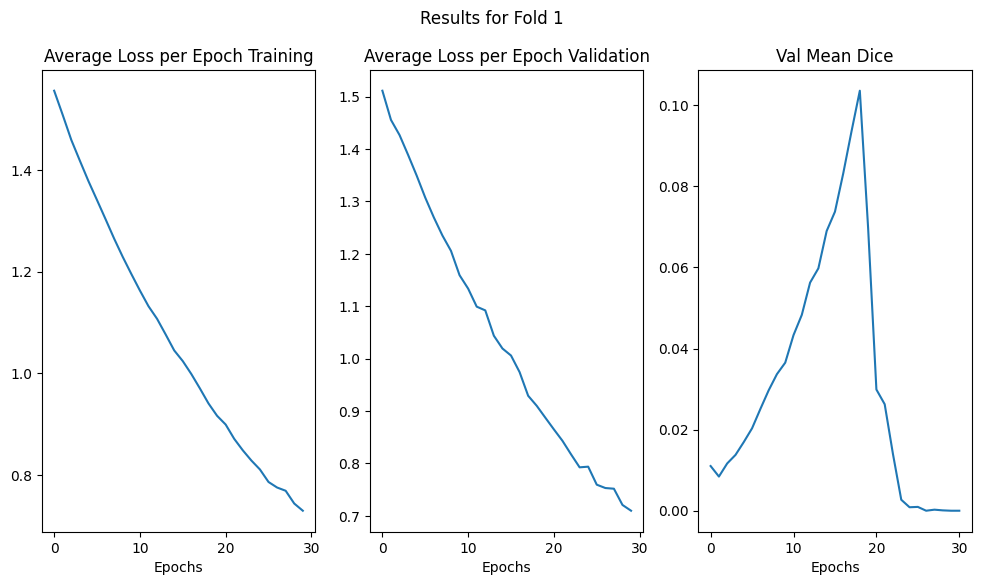

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params | Mode 
-----------------------------------------------------
0 | _model        | UNet       | 4.8 M  | train
1 | loss_function | DiceCELoss | 0      | train
-----------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)
148       Modules in train mode
0         Modules in eval mode


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]current epoch: 0 current val_loss: 35.923583984375 current mean dice: 0.0090
best mean dice: 0.0090 at epoch: 0
Epoch 0: 100%|██████████| 24/24 [00:09<00:00,  2.54it/s, v_num=1]          current epoch: 0 current val_loss: 1.419778823852539 current mean dice: 0.0091
best mean dice: 0.0091 at epoch: 0
Epoch 1: 100%|██████████| 24/24 [00:07<00:00,  3.14it/s, v_num=1]current epoch: 1 current val_loss: 1.3511250019073486 current mean dice: 0.0185
best mean dice: 0.0185 at epoch: 1
Epoch 2: 100%|██████████| 24/24 [00:07<00:00,  3.35it/s, v_num=1]current epoch: 2 current val_loss: 1.3079053163528442 current mean dice: 0.0258
best mean dice: 0.0258 at epoch: 2
Epoch 3: 100%|██████████| 24/24 [00:06<00:00,  3.73it/s, v_num=1]current epoch: 3 current val_loss: 1.2722454071044922 current mean dice: 0.0282
best mean dice: 0.0282 at epoch: 3
Epoch 4: 100%|██████████| 24/24 [00:06<00:00,  3.75it/s, v_num=1]current epoch: 4 cu

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 24/24 [00:06<00:00,  3.93it/s, v_num=1]


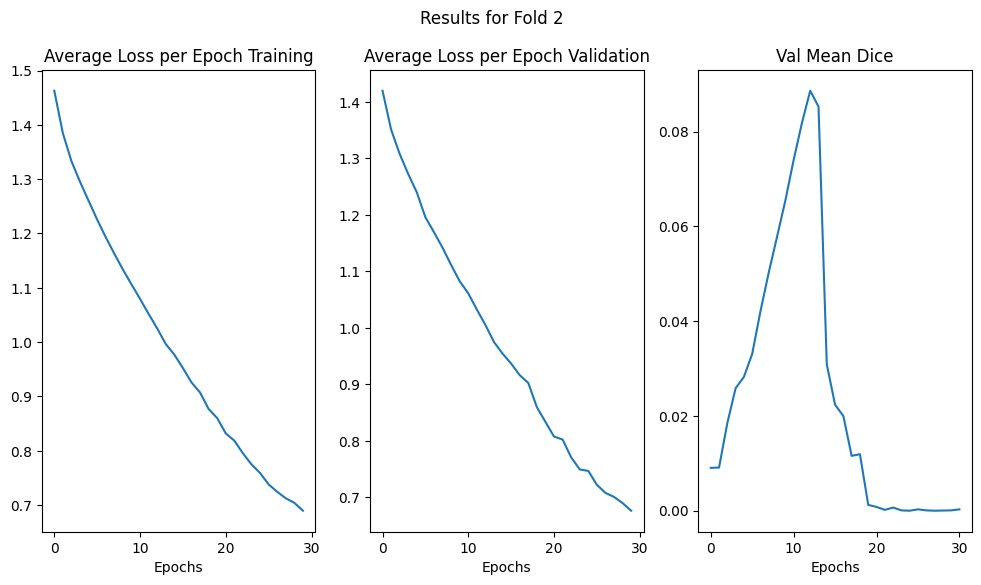

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params | Mode 
-----------------------------------------------------
0 | _model        | UNet       | 4.8 M  | train
1 | loss_function | DiceCELoss | 0      | train
-----------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)
148       Modules in train mode
0         Modules in eval mode


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]current epoch: 0 current val_loss: 11.871749877929688 current mean dice: 0.0081
best mean dice: 0.0081 at epoch: 0
Epoch 0: 100%|██████████| 24/24 [00:08<00:00,  2.95it/s, v_num=2]          current epoch: 0 current val_loss: 1.3152130842208862 current mean dice: 0.0032
best mean dice: 0.0081 at epoch: 0
Epoch 1: 100%|██████████| 24/24 [00:06<00:00,  3.46it/s, v_num=2]current epoch: 1 current val_loss: 1.2597113847732544 current mean dice: 0.0006
best mean dice: 0.0081 at epoch: 0
Epoch 2: 100%|██████████| 24/24 [00:06<00:00,  3.79it/s, v_num=2]current epoch: 2 current val_loss: 1.2177400588989258 current mean dice: 0.0003
best mean dice: 0.0081 at epoch: 0
Epoch 3: 100%|██████████| 24/24 [00:07<00:00,  3.41it/s, v_num=2]current epoch: 3 current val_loss: 1.1815285682678223 current mean dice: 0.0003
best mean dice: 0.0081 at epoch: 0
Epoch 4: 100%|██████████| 24/24 [00:05<00:00,  4.23it/s, v_num=2]current epoch: 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s, v_num=2]


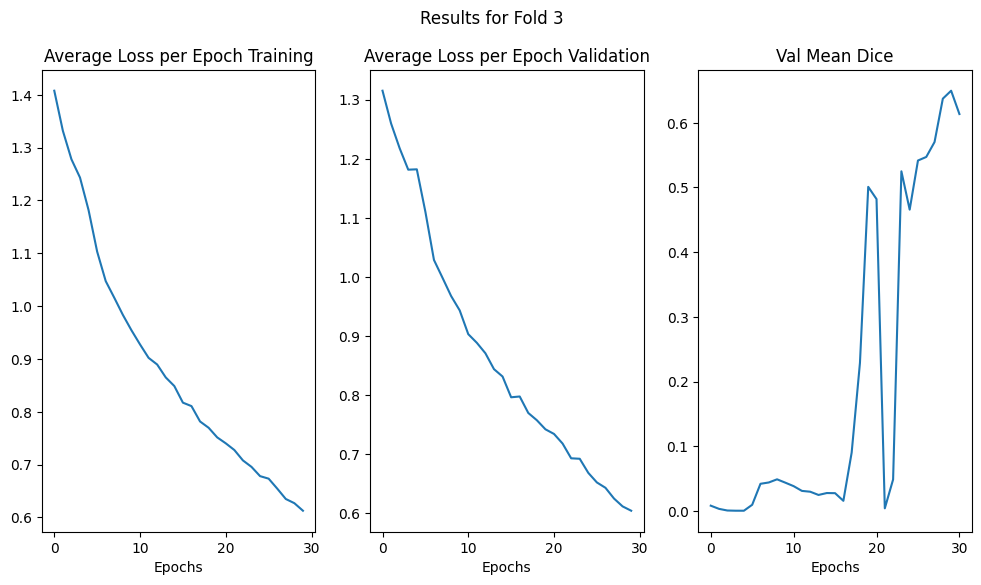

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params | Mode 
-----------------------------------------------------
0 | _model        | UNet       | 4.8 M  | train
1 | loss_function | DiceCELoss | 0      | train
-----------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)
148       Modules in train mode
0         Modules in eval mode


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]current epoch: 0 current val_loss: 44.11774444580078 current mean dice: 0.0079
best mean dice: 0.0079 at epoch: 0
Epoch 0: 100%|██████████| 24/24 [00:09<00:00,  2.64it/s, v_num=3]          current epoch: 0 current val_loss: 1.6835296154022217 current mean dice: 0.0085
best mean dice: 0.0085 at epoch: 0
Epoch 1: 100%|██████████| 24/24 [00:06<00:00,  3.66it/s, v_num=3]current epoch: 1 current val_loss: 1.514689326286316 current mean dice: 0.0072
best mean dice: 0.0085 at epoch: 0
Epoch 2: 100%|██████████| 24/24 [00:06<00:00,  3.93it/s, v_num=3]current epoch: 2 current val_loss: 1.4413305521011353 current mean dice: 0.0041
best mean dice: 0.0085 at epoch: 0
Epoch 3: 100%|██████████| 24/24 [00:06<00:00,  3.52it/s, v_num=3]current epoch: 3 current val_loss: 1.4042026996612549 current mean dice: 0.0008
best mean dice: 0.0085 at epoch: 0
Epoch 4: 100%|██████████| 24/24 [00:07<00:00,  3.29it/s, v_num=3]current epoch: 4 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 24/24 [00:06<00:00,  3.87it/s, v_num=3]


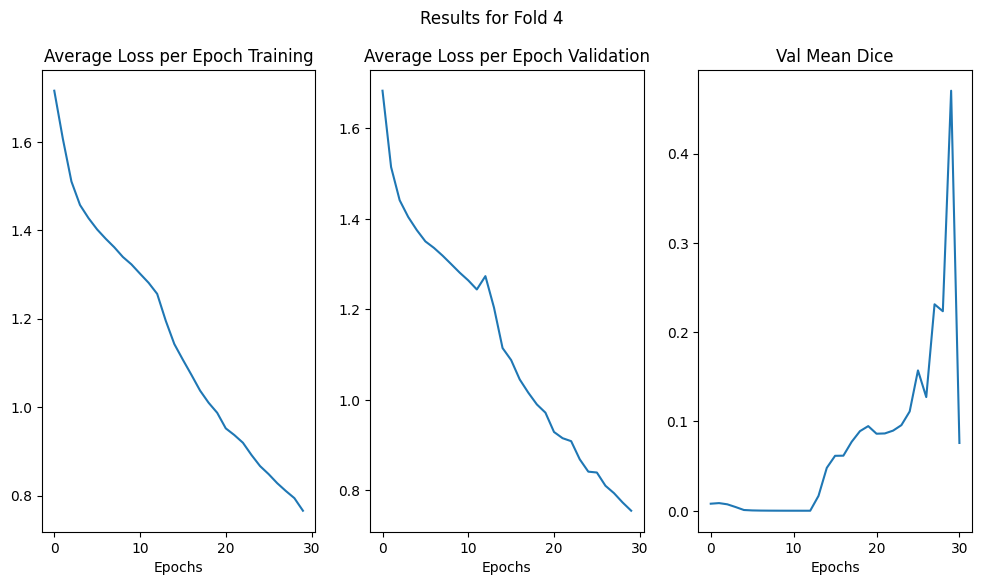

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params | Mode 
-----------------------------------------------------
0 | _model        | UNet       | 4.8 M  | train
1 | loss_function | DiceCELoss | 0      | train
-----------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)
148       Modules in train mode
0         Modules in eval mode


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]current epoch: 0 current val_loss: 11.816781997680664 current mean dice: 0.0076
best mean dice: 0.0076 at epoch: 0
Epoch 0: 100%|██████████| 24/24 [00:07<00:00,  3.12it/s, v_num=4]          current epoch: 0 current val_loss: 1.5475959777832031 current mean dice: 0.0065
best mean dice: 0.0076 at epoch: 0
Epoch 1: 100%|██████████| 24/24 [00:06<00:00,  3.67it/s, v_num=4]current epoch: 1 current val_loss: 1.4971575736999512 current mean dice: 0.0072
best mean dice: 0.0076 at epoch: 0
Epoch 2: 100%|██████████| 24/24 [00:08<00:00,  2.76it/s, v_num=4]current epoch: 2 current val_loss: 1.4223474264144897 current mean dice: 0.0143
best mean dice: 0.0143 at epoch: 2
Epoch 3: 100%|██████████| 24/24 [00:06<00:00,  3.94it/s, v_num=4]current epoch: 3 current val_loss: 1.3527450561523438 current mean dice: 0.0198
best mean dice: 0.0198 at epoch: 3
Epoch 4: 100%|██████████| 24/24 [00:06<00:00,  3.87it/s, v_num=4]current epoch: 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 24/24 [00:09<00:00,  2.55it/s, v_num=4]


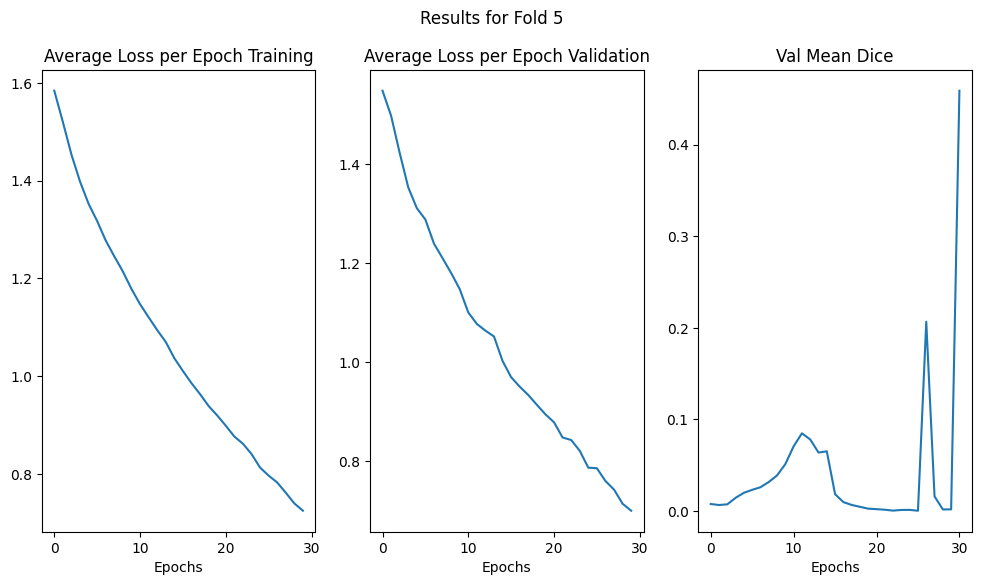

In [7]:
with open(PATH + "dataset.json", 'r') as f:
    data = json.load(f)

test_size = int(0.1 * len(data["training"]))
for i,  entry in enumerate(data["training"]):
        entry['image'] = os.path.abspath(os.path.join(PATH, entry['image']))
        entry['label'] = os.path.abspath(os.path.join(PATH, entry['label']))
test_data = data["training"][:test_size]
train_val_data = data["training"][test_size:]
kf = KFold(n_splits=K_FOLDS)
for i, (train_index, val_index) in enumerate(kf.split(train_val_data), 1):
    data['training'] = [train_val_data[idx] for idx in train_index]
    data['validation'] = [train_val_data[idx] for idx in val_index]
    data['test'] = test_data

    # initialise the LightningModule
    net = Net(device=device, data=data, augmentation=True)

    # set up checkpoints
    #checkpoint_callback = ModelCheckpoint(dirpath="./heart_data_lightning_models/", filename='{epoch}-{val_loss:.2f}-{val_dice:.2f}', monitor="val_dice", mode="max")
    #early_stopping_callback = EarlyStopping(monitor="val_loss", mode="min", patience=5)
    max_epochs = 30

    # initialise Lightning's trainer.
    trainer = lightning.Trainer(
        devices=[0],
        max_epochs=max_epochs,
        #callbacks=[checkpoint_callback, early_stopping_callback],
        log_every_n_steps=4,
    )

    # train
    trainer.fit(net)

    # TODO add plot of each fold validation metric
    plot_results(net, i)